# Numpy Extension - Image Processing

In this extension, we will will import a simple PNG image file and convert it into a numpy array. We will then do some data processing on the array so that the image looks different.

Before you start, you will need to add the PNG file from this URL path:
https://raw.githubusercontent.com/guyfrancis/dat1001/refs/heads/main/star_icon.png

Image shape: (32, 32, 4)
Data type: uint8


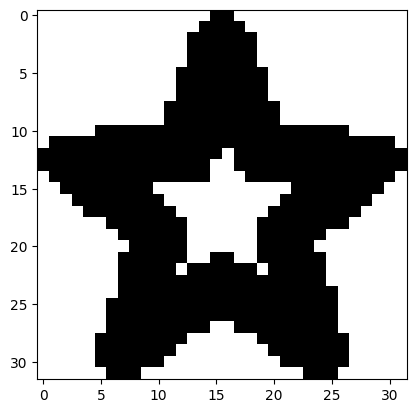

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# 1. Open the image file
img = Image.open('star_icon.png')

# 2. Convert the image object to a Numpy array
img_array = np.array(img)

# 3. Print the array's shape and data type
print(f"Image shape: {img_array.shape}")
print(f"Data type: {img_array.dtype}")

# 4. Print the image array as an image
plt.imshow(img_array, interpolation='nearest')
plt.show()

# Changing the Image Data

The PNG file is a simple 32 x 32 pixel image. For each pixel, there are 4 values stored, each in the range 0-255. The first 3 values represent the Red, Green and Blue values in the image. The 4th value is a 'alpha channel' which represents transparency. In this image, the alpha channel is set to 255 which means the image is opaque.

Because this image is black and white, the 4 values for each pixel are either `[0, 0, 0, 255]` or `[255, 255, 255, 255]`. 

Let's inspect a few pixels. Try and locate the pixels in the image above.

In [2]:
# Print the 4 values for pixel in position (0, 0) (top left)
print(img_array[0][0])
# Print the 4 values for pixel in position (0, 15) (top middle)
print(img_array[0][15])
# Print the 4 values for pixel in position (0, 15) (middle left)
print(img_array[15][0])

[255 255 255 255]
[  0   0   0 255]
[255 255 255 255]


We will now do some processing on the numbers in the numpy array.

The code below flips RGB values from 255 to 0 and from 0 to 255. So the 4 value arrays for each pixel will flip as follows:

-`[0 0 0 255] -> [255 255 255 255]`

-`[255 255 255 255] -> [0 0 0 255]`

This should have the effect of changing all the black pixels to white and white to black.

In [3]:
# Now we will do some processing on the array. 
for x in range(32):
    for y in range(32):
        for z in range(0, 3):
            if(img_array[x][y][z]==255):
                img_array[x][y][z]=0
            elif(img_array[x][y][z]==0):
                img_array[x][y][z]=255

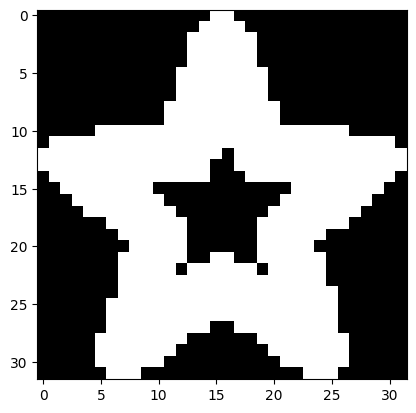

In [4]:
# Now print the image again - black and white should be flipped
plt.imshow(img_array, interpolation='nearest')
plt.show()

Here is a more Pythonic version of the same iteration code in the cell above. It does the same thing as the for loops, but in slightly fewer lines. If you run this code now, you should get back the original image.

In [5]:
for indices, value in np.ndenumerate(img_array):
    if value==0 and indices[2]<3:
        img_array[indices]=255
    if value==255 and indices[2]<3:
        img_array[indices]=0

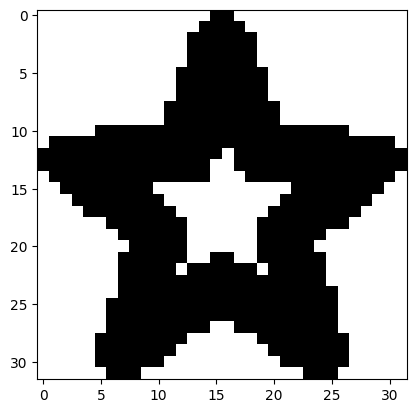

In [6]:
# Now print the image again - black and white should be flipped
plt.imshow(img_array, interpolation='nearest')
plt.show()

## Your Task

Write some code that changes the image in some way.

1. First change black to red for all pixels.
2. Change white to blue for all pixels
3. Change the pixels in the center of the star so that the start image appears as solid without a hole.

These are just suggestions. You can change the image in other ways as well if you prefer. You should find the code block with multiple for loops above useful. 

Onve you've modified the numpy array, print the image again to see the changes you have made.

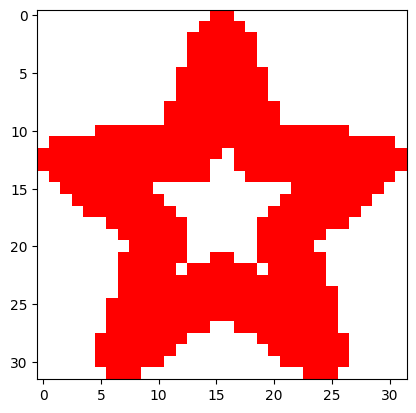

In [7]:
# This code changes black to red
for x in range(32):
    for y in range(32):
        if(img_array[x][y][0]==0 and img_array[x][y][1]==0 and img_array[x][y][2]==0):
            # This means pixel must be black
            # Set red to 255
            img_array[x][y][0]=255
        
# Now print the image again
plt.imshow(img_array, interpolation='nearest')
plt.show()

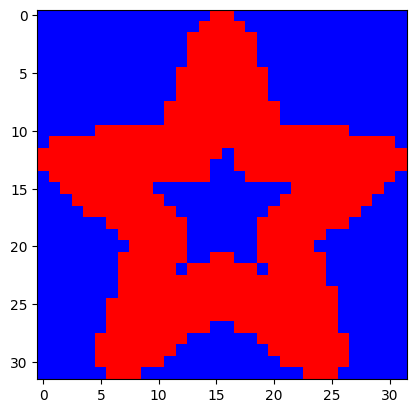

In [8]:
# This code changes white to blue
for x in range(32):
    for y in range(32):
        if(img_array[x][y][0]==255 and img_array[x][y][1]==255 and img_array[x][y][2]==255):
            # This means pixel must be white
            # Set white to blue by setting red and green to 0
            img_array[x][y][0]=0
            img_array[x][y][1]=0
# Now print the image again
plt.imshow(img_array, interpolation='nearest')
plt.show()

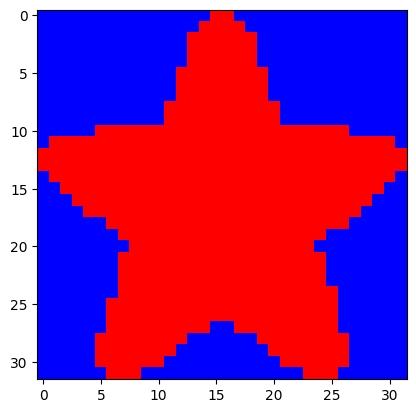

In [9]:
# This code fills in the center of the star as red
for x in range(12, 23):
    for y in range(10, 23):
            img_array[x][y][0]=255
            img_array[x][y][1]=0
            img_array[x][y][2]=0
# Now print the image again
plt.imshow(img_array, interpolation='nearest')
plt.show()